# prepare environment 

In [1]:
from pyspark.sql import *

In [2]:
from pyspark.sql.functions import *
import pyspark.sql.functions as f

In [3]:
 import json

In [4]:
SparkSession

pyspark.sql.session.SparkSession

In [5]:
SparkContext

pyspark.context.SparkContext

In [6]:
spark = SparkSession.builder.config("spark.sql.debug.maxToStringFields", "1000").getOrCreate()

In [7]:
spark

In [8]:
sc=spark.sparkContext

In [9]:
sc

<SparkContext master=local[*] appName=PySparkShell>

# extract data and convert to df

In [10]:
dat1=sc.textFile("bigdatafile.json") #as RDD

In [11]:
dat1.take(2)

['{"InvoiceNo":536365,"InvoiceDate":1291161600000,"CustomerID":17850,"branch_name":"United Kingdom","branch_id":36,"salesperson_id":57,"product_id":3367,"product_name":"85123A","Description":"WHITE HANGING HEART T-LIGHT HOLDER","quantity_sold":6,"UnitPrice":2.55,"totalsales":15.3}',
 '{"InvoiceNo":536365,"InvoiceDate":1291161600000,"CustomerID":17850,"branch_name":"United Kingdom","branch_id":36,"salesperson_id":74,"product_id":2432,"product_name":71053,"Description":"WHITE METAL LANTERN","quantity_sold":6,"UnitPrice":3.39,"totalsales":20.34}']

In [12]:
count1=dat1.count()
count1

406829

In [13]:
dat2=dat1.map(lambda y : json.loads(y)) # as python dict

In [14]:
count2=dat2.count()
count2

406829

In [15]:
dat2.take(2)

[{'InvoiceNo': 536365,
  'InvoiceDate': 1291161600000,
  'CustomerID': 17850,
  'branch_name': 'United Kingdom',
  'branch_id': 36,
  'salesperson_id': 57,
  'product_id': 3367,
  'product_name': '85123A',
  'Description': 'WHITE HANGING HEART T-LIGHT HOLDER',
  'quantity_sold': 6,
  'UnitPrice': 2.55,
  'totalsales': 15.3},
 {'InvoiceNo': 536365,
  'InvoiceDate': 1291161600000,
  'CustomerID': 17850,
  'branch_name': 'United Kingdom',
  'branch_id': 36,
  'salesperson_id': 74,
  'product_id': 2432,
  'product_name': 71053,
  'Description': 'WHITE METAL LANTERN',
  'quantity_sold': 6,
  'UnitPrice': 3.39,
  'totalsales': 20.34}]

In [16]:
dat3=dat2.map(lambda x : Row(**x))
#**x does this automatically by unpacking the dictionary.
#If x = {'name': 'Alice', 'age': 25}, using Row(**x) will be the same as writing:
#Row(name='Alice', age=25)

In [17]:
count3=dat3.count()
count3

406829

# convert to DF from RDD

In [18]:
df=spark.createDataFrame(dat3)

In [19]:
count_df=df.count()
count_df

406829

In [20]:
df.printSchema()

root
 |-- InvoiceNo: long (nullable = true)
 |-- InvoiceDate: long (nullable = true)
 |-- CustomerID: long (nullable = true)
 |-- branch_name: string (nullable = true)
 |-- branch_id: long (nullable = true)
 |-- salesperson_id: long (nullable = true)
 |-- product_id: long (nullable = true)
 |-- product_name: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- quantity_sold: long (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- totalsales: double (nullable = true)



In [21]:
df.show(5)

24/10/09 06:50:57 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 9 (TID 20): Attempting to kill Python Worker


+---------+-------------+----------+--------------+---------+--------------+----------+------------+--------------------+-------------+---------+----------+
|InvoiceNo|  InvoiceDate|CustomerID|   branch_name|branch_id|salesperson_id|product_id|product_name|         Description|quantity_sold|UnitPrice|totalsales|
+---------+-------------+----------+--------------+---------+--------------+----------+------------+--------------------+-------------+---------+----------+
|   536365|1291161600000|     17850|United Kingdom|       36|            57|      3367|      85123A|WHITE HANGING HEA...|            6|     2.55|      15.3|
|   536365|1291161600000|     17850|United Kingdom|       36|            74|      2432|       71053| WHITE METAL LANTERN|            6|     3.39|     20.34|
|   536365|1291161600000|     17850|United Kingdom|       36|            71|      3129|      84406B|CREAM CUPID HEART...|            8|     2.75|      22.0|
|   536365|1291161600000|     17850|United Kingdom|       

In [22]:

df = df.withColumn(
    "InvoiceDate",date_format((col("InvoiceDate")/ 1000).cast("timestamp"), "yyyy-MM-dd")
)

In [23]:
df.show(5)

+---------+-----------+----------+--------------+---------+--------------+----------+------------+--------------------+-------------+---------+----------+
|InvoiceNo|InvoiceDate|CustomerID|   branch_name|branch_id|salesperson_id|product_id|product_name|         Description|quantity_sold|UnitPrice|totalsales|
+---------+-----------+----------+--------------+---------+--------------+----------+------------+--------------------+-------------+---------+----------+
|   536365| 2010-12-01|     17850|United Kingdom|       36|            57|      3367|      85123A|WHITE HANGING HEA...|            6|     2.55|      15.3|
|   536365| 2010-12-01|     17850|United Kingdom|       36|            74|      2432|       71053| WHITE METAL LANTERN|            6|     3.39|     20.34|
|   536365| 2010-12-01|     17850|United Kingdom|       36|            71|      3129|      84406B|CREAM CUPID HEART...|            8|     2.75|      22.0|
|   536365| 2010-12-01|     17850|United Kingdom|       36|           

24/10/09 06:51:03 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 10 (TID 21): Attempting to kill Python Worker


In [83]:
df2=df.select(
    "InvoiceNo",
    "InvoiceDate",
    "CustomerID",
    "branch_name",
    "branch_id",
    "salesperson_id",
    "product_id",
    "product_name",
    "Description"
)
# select only colum  not aggreagte 

In [84]:
df2.show(10)

+---------+-----------+----------+--------------+---------+--------------+----------+------------+--------------------+
|InvoiceNo|InvoiceDate|CustomerID|   branch_name|branch_id|salesperson_id|product_id|product_name|         Description|
+---------+-----------+----------+--------------+---------+--------------+----------+------------+--------------------+
|   536365| 2010-12-01|     17850|United Kingdom|       36|            57|      3367|      85123A|WHITE HANGING HEA...|
|   536365| 2010-12-01|     17850|United Kingdom|       36|            74|      2432|       71053| WHITE METAL LANTERN|
|   536365| 2010-12-01|     17850|United Kingdom|       36|            71|      3129|      84406B|CREAM CUPID HEART...|
|   536365| 2010-12-01|     17850|United Kingdom|       36|            92|      3099|      84029G|KNITTED UNION FLA...|
|   536365| 2010-12-01|     17850|United Kingdom|       36|            73|      3098|      84029E|RED WOOLLY HOTTIE...|
|   536365| 2010-12-01|     17850|United

24/10/09 02:53:58 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 12 (TID 26): Attempting to kill Python Worker


In [85]:
df3=df2.where(col('branch_name')=='United Kingdom')

In [31]:
df3c=df3.count()
df3c

361878

In [32]:
df3.show(200)

+---------+-----------+----------+--------------+---------+--------------+----------+------------+--------------------+
|InvoiceNo|InvoiceDate|CustomerID|   branch_name|branch_id|salesperson_id|product_id|product_name|         Description|
+---------+-----------+----------+--------------+---------+--------------+----------+------------+--------------------+
|   536365| 2010-12-01|     17850|United Kingdom|       36|            57|      3367|      85123A|WHITE HANGING HEA...|
|   536365| 2010-12-01|     17850|United Kingdom|       36|            74|      2432|       71053| WHITE METAL LANTERN|
|   536365| 2010-12-01|     17850|United Kingdom|       36|            71|      3129|      84406B|CREAM CUPID HEART...|
|   536365| 2010-12-01|     17850|United Kingdom|       36|            92|      3099|      84029G|KNITTED UNION FLA...|
|   536365| 2010-12-01|     17850|United Kingdom|       36|            73|      3098|      84029E|RED WOOLLY HOTTIE...|
|   536365| 2010-12-01|     17850|United

24/10/09 01:18:24 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 17 (TID 33): Attempting to kill Python Worker


# analysis at DF

- Top 10 Customers by Total Sales: Find the top customers who have generated the highest total sales.

In [24]:
top_customers = df.groupBy("CustomerID").agg(f.sum("totalsales").alias('totalsum for each customer'))\
.orderBy("totalsum for each customer", ascending=False).limit(10)


In [25]:
top_customers.printSchema()

root
 |-- CustomerID: long (nullable = true)
 |-- totalsum for each customer: double (nullable = true)



In [26]:
top_customers.show()

+----------+--------------------------+
|CustomerID|totalsum for each customer|
+----------+--------------------------+
|     14646|         279489.0199999998|
|     18102|        256438.48999999996|
|     17450|        187482.16999999998|
|     14911|        132572.62000000002|
|     12415|        123725.45000000003|
|     14156|        113384.14000000014|
|     17511|         88125.37999999998|
|     16684|                  65892.08|
|     13694|         62653.10000000002|
|     15311|         59419.34000000007|
+----------+--------------------------+



# ---------------

- Top 5 Salespersons by Total Sales: Analyze the performance of salespersons.

In [27]:
top_salesperson = df.groupBy("salesperson_id").agg(f.sum("totalsales").alias('totalsum for each salesperson'))\
.orderBy("totalsum for each salesperson", ascending=False).limit(5)

In [28]:
top_salesperson.printSchema()

root
 |-- salesperson_id: long (nullable = true)
 |-- totalsum for each salesperson: double (nullable = true)



In [29]:
top_salesperson.show()

+--------------+-----------------------------+
|salesperson_id|totalsum for each salesperson|
+--------------+-----------------------------+
|            35|            250340.3000000002|
|            77|           157347.76999999964|
|            57|           127161.93999999987|
|            28|            98035.94000000012|
|            66|             97008.4700000002|
+--------------+-----------------------------+



# -------------

- Monthly Sales Trend

In [30]:
monthly_sales = df.withColumn("month", month("InvoiceDate")).groupBy("month") \
    .agg(f.sum("totalsales").alias('totalsum for each month')) \
    .orderBy("month",ascending=False)

In [31]:
monthly_sales.printSchema()

root
 |-- month: integer (nullable = true)
 |-- totalsum for each month: double (nullable = true)



In [32]:
monthly_sales.count()

12

In [33]:
monthly_sales.show() # maxim 20 

+-----+-----------------------+
|month|totalsum for each month|
+-----+-----------------------+
|   12|      897110.4000000213|
|   11|     1132407.7399999949|
|   10|      974603.5899999909|
|    9|      931440.3720000209|
|    8|      616368.0000000092|
|    7|       574238.481000012|
|    6|      608013.1600000106|
|    5|      648251.0799999991|
|    4|      426047.8510000125|
|    3|      579964.6100000151|
|    2|      436546.1500000147|
|    1|     475074.38000001636|
+-----+-----------------------+



# ---------------

- Sales Distribution by Branch

In [34]:
sales_branch = df.groupBy('branch_id', 'branch_name') \
    .agg(f.sum('totalsales').alias("totalsum for each Branch")) \
    .orderBy('totalsum for each Branch', ascending=False).limit(5)

In [35]:
sales_branch.count()

5

In [36]:
sales_branch.printSchema()

root
 |-- branch_id: long (nullable = true)
 |-- branch_name: string (nullable = true)
 |-- totalsum for each Branch: double (nullable = true)



In [37]:
sales_branch.show(5)

+---------+--------------+------------------------+
|branch_id|   branch_name|totalsum for each Branch|
+---------+--------------+------------------------+
|       36|United Kingdom|       6767873.393999164|
|       24|   Netherlands|      284661.53999999975|
|       11|          EIRE|      250285.21999999945|
|       15|       Germany|      221698.21000000072|
|       14|        France|               196712.84|
+---------+--------------+------------------------+



# ------------------

- Top 10 Products by Quantity Sold

In [38]:
top_products_quantity = df.groupBy("product_name") \
    .agg(f.sum("quantity_sold").alias('totalquantity 4 each product')) \
    .orderBy('totalquantity 4 each product', ascending=False) \
    .limit(10)


In [39]:
top_products_quantity.printSchema()

root
 |-- product_name: string (nullable = true)
 |-- totalquantity 4 each product: long (nullable = true)



In [40]:
top_products_quantity.show()

+------------+----------------------------+
|product_name|totalquantity 4 each product|
+------------+----------------------------+
|       84077|                       53215|
|       22197|                       48712|
|      85099B|                       45066|
|       84879|                       35314|
|      85123A|                       34204|
|       21212|                       33409|
|       23084|                       27094|
|       22492|                       25880|
|       22616|                       25321|
|       21977|                       24163|
+------------+----------------------------+



# ---------------

- Product Performance by Branch

In [57]:
#df=df.filter(col("branch_name") != 'Unspecified')

In [58]:
product_branch = df.groupBy("branch_name","product_name") \
    .agg(f.sum('totalsales').alias("total_sales")) \
    .orderBy("branch_name", "total_sales", ascending=False)


In [59]:
product_branch.printSchema()

root
 |-- branch_name: string (nullable = true)
 |-- product_name: string (nullable = true)
 |-- total_sales: double (nullable = true)



In [60]:
product_branch.count()

18768

In [61]:
product_branch.show(3666)

+--------------------+------------+-------------------+
|         branch_name|product_name|        total_sales|
+--------------------+------------+-------------------+
|      United Kingdom|       22423| 103122.85000000003|
|      United Kingdom|      85123A|  88469.30000000009|
|      United Kingdom|      85099B|   75416.6699999998|
|      United Kingdom|       47566| 61952.579999999914|
|      United Kingdom|       84879|  52314.87000000025|
|      United Kingdom|       22502|  46157.99999999999|
|      United Kingdom|       79321|  45155.60999999999|
|      United Kingdom|       22086|   39596.7300000001|
|      United Kingdom|       21137|           37799.42|
|      United Kingdom|       22197|  34110.12999999999|
|      United Kingdom|       82484|  33408.75999999996|
|      United Kingdom|       23284| 33284.049999999974|
|      United Kingdom|       22386| 32608.169999999925|
|      United Kingdom|       23203|   31785.4799999999|
|      United Kingdom|       23298| 30320.240000

In [46]:
product_branch_filter=product_branch.where(col('branch_name')== 'United Kingdom')

In [47]:
product_branch_filter.count()

3661

In [48]:
product_branch_filter.printSchema()

root
 |-- branch_name: string (nullable = true)
 |-- product_name: string (nullable = true)
 |-- total_sales: double (nullable = true)



In [62]:
product_branch_filter.show(3661)

+--------------+------------+-------------------+
|   branch_name|product_name|        total_sales|
+--------------+------------+-------------------+
|United Kingdom|       22423| 103122.85000000003|
|United Kingdom|      85123A|  88469.30000000009|
|United Kingdom|      85099B|   75416.6699999998|
|United Kingdom|       47566| 61952.579999999914|
|United Kingdom|       84879|  52314.87000000025|
|United Kingdom|       22502|  46157.99999999999|
|United Kingdom|       79321|  45155.60999999999|
|United Kingdom|       22086|   39596.7300000001|
|United Kingdom|       21137|           37799.42|
|United Kingdom|       22197|  34110.12999999999|
|United Kingdom|       82484|  33408.75999999996|
|United Kingdom|       23284| 33284.049999999974|
|United Kingdom|       22386| 32608.169999999925|
|United Kingdom|       23203|   31785.4799999999|
|United Kingdom|       23298| 30320.240000000038|
|United Kingdom|      85099F|  28375.48999999997|
|United Kingdom|       22470| 28139.699999999968|


# -----------------

- Average Sales per Customer

In [63]:
avg_sales_per_customer = df.groupBy("CustomerID").agg(f.avg('totalsales').alias('avgsales'))\
.orderBy('avgsales', ascending=False)

In [64]:
avg_sales_per_customer.count()

4368

In [65]:
avg_sales_per_customer.printSchema()

root
 |-- CustomerID: long (nullable = true)
 |-- avgsales: double (nullable = true)



In [66]:
avg_sales_per_customer.show(100)

+----------+------------------+
|CustomerID|          avgsales|
+----------+------------------+
|     15195|            3861.0|
|     13135|            3096.0|
|     17846|            2033.1|
|     16532|            1687.2|
|     15749|1435.7266666666667|
|     16000|1377.0777777777778|
|     16754|            1001.2|
|     12798| 872.1299999999999|
|     17553|             743.8|
|     17949| 667.7321518987343|
|     16308|             640.0|
|     16986|             624.4|
|     18080|            615.75|
|     18102| 592.2366974595842|
|     16333| 591.7066666666667|
|     13270|             590.0|
|     17291|             550.8|
|     18087| 538.5885714285714|
|     17443|            534.24|
|     17450| 534.1372364672364|
|     16041| 527.7333333333333|
|     15389|             500.0|
|     17857|477.91678571428577|
|     18233|             440.0|
|     15524|             440.0|
|     16881|             432.0|
|     16692| 425.3333333333333|
|     16737|             417.6|
|     15

# ----------------

- Top 5 Products by Total Sales in a Specific Branch

In [67]:
branch_name = "United Kingdom"  # Example branch
top_products_branch = df.filter(col("branch_name") == branch_name) \
    .groupBy("product_name").agg(f.sum('totalsales').alias('total_sales')) \
    .orderBy("total_sales", ascending=False) 

In [68]:
top_products_branch.count()

3661

In [69]:
top_products_branch.show(5)

+------------+------------------+
|product_name|       total_sales|
+------------+------------------+
|       22423|103122.85000000003|
|      85123A| 88469.30000000009|
|      85099B|  75416.6699999998|
|       47566|61952.579999999914|
|       84879| 52314.87000000025|
+------------+------------------+
only showing top 5 rows



# -------------

- Calculate Revenue per Sale

In [70]:
df = df.withColumn("revenue_per_sale", col("totalsales") / col("quantity_sold"))
df.select("product_name", "totalsales", "quantity_sold", "revenue_per_sale").show(10)


+------------+----------+-------------+------------------+
|product_name|totalsales|quantity_sold|  revenue_per_sale|
+------------+----------+-------------+------------------+
|      85123A|      15.3|            6|2.5500000000000003|
|       71053|     20.34|            6|              3.39|
|      84406B|      22.0|            8|              2.75|
|      84029G|     20.34|            6|              3.39|
|      84029E|     20.34|            6|              3.39|
|       22752|      15.3|            2|              7.65|
|       21730|      25.5|            6|              4.25|
|       22633|      11.1|            6|1.8499999999999999|
|       22632|      11.1|            6|1.8499999999999999|
|       84879|     54.08|           32|              1.69|
+------------+----------+-------------+------------------+
only showing top 10 rows



24/10/09 06:57:14 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 107 (TID 146): Attempting to kill Python Worker


# some analysis using window funcation 

-  Ranking Products Based on Sales within Branches

In [71]:
# Define the window specification (partition by branch_name, order by total_sales descending)
window_spec = Window.partitionBy("branch_name").orderBy(f.desc("totalsales"))

In [72]:
# Apply the rank() function using the window specification
df_ranked = df.withColumn("product_rank", f.rank().over(window_spec))

In [73]:
df_ranked_fil=df_ranked.select("branch_name","totalsales","product_rank")

In [74]:
df_ranked_fil.count()

406585

In [76]:
df_ranked_fil.show(1270)

+-----------+----------+------------+
|branch_name|totalsales|product_rank|
+-----------+----------+------------+
|  Australia|    1718.4|           1|
|  Australia|    1260.0|           2|
|  Australia|    1074.0|           3|
|  Australia|    1039.0|           4|
|  Australia|    1020.0|           5|
|  Australia|     996.0|           6|
|  Australia|     996.0|           6|
|  Australia|     963.0|           8|
|  Australia|     963.0|           8|
|  Australia|     963.0|           8|
|  Australia|     963.0|           8|
|  Australia|     828.0|          12|
|  Australia|     813.6|          13|
|  Australia|     813.6|          13|
|  Australia|     765.0|          15|
|  Australia|     763.2|          16|
|  Australia|     720.0|          17|
|  Australia|     700.8|          18|
|  Australia|    650.88|          19|
|  Australia|     633.6|          20|
|  Australia|     626.4|          21|
|  Australia|    624.24|          22|
|  Australia|    601.44|          23|
|  Australia

In [ ]:
#By applying the ranking function, 
#you're transforming your original sales data into a more insightful format 
#that allows for better analysis of product performance across different branches

# -----

- Top-N Products per Branch (Dense Rank)

In [77]:
# Define the window specification (partition by branch_name, order by totalsales descending)
window_spec_top_n = Window.partitionBy("branch_name").orderBy(f.desc("totalsales"))

In [78]:
# Apply dense_rank() to rank products
df_top_n = df.withColumn("product_rank", f.dense_rank().over(window_spec_top_n))

In [79]:
# Filter for top 3 products in each branch
df_top_3 = df_top_n.filter(f.col("product_rank") <= 3)

In [80]:
# Show the top 3 products per branch
df_top_3.show(truncate=False)

+---------+-----------+----------+-----------+---------+--------------+----------+------------+----------------------------------+-------------+---------+----------+------------------+------------+
|InvoiceNo|InvoiceDate|CustomerID|branch_name|branch_id|salesperson_id|product_id|product_name|Description                       |quantity_sold|UnitPrice|totalsales|revenue_per_sale  |product_rank|
+---------+-----------+----------+-----------+---------+--------------+----------+------------+----------------------------------+-------------+---------+----------+------------------+------------+
|576394   |2011-11-15 |12415     |Australia  |1        |71            |1854      |23084       |RABBIT NIGHT LIGHT                |960          |1.79     |1718.4    |1.79              |1           |
|563614   |2011-08-18 |12415     |Australia  |1        |69            |1717      |22940       |FELTCRAFT CHRISTMAS FAIRY         |336          |3.75     |1260.0    |3.75              |2           |
|545475   

# Visualization after Converting to Pandas DataFrame

- 1. Top 10 Products by Total Sales (Bar Plot)

In [167]:
import matplotlib.pyplot as plt
import pandas as pd

In [168]:
# Convert to Pandas
top_products_sales_df = top_products_quantity.toPandas()
# Matplotlib (the library you're using to create the bar plot) works more seamlessly
# with Pandas DataFrames rather than PySpark DataFrames. 

In [169]:
print(top_products_sales_df.columns)


Index(['product_name', 'totalquantity 4 each product'], dtype='object')


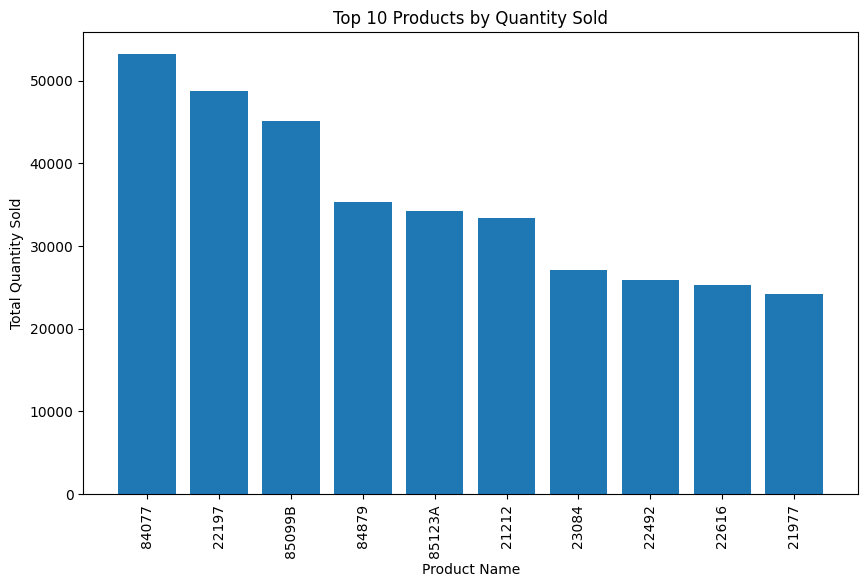

In [170]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_products_sales_df['product_name'], top_products_sales_df['totalquantity 4 each product'])
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.show()

# ------

-  Monthly Sales Trend (Line Plot)

Index(['month', 'totalsum for each month'], dtype='object')


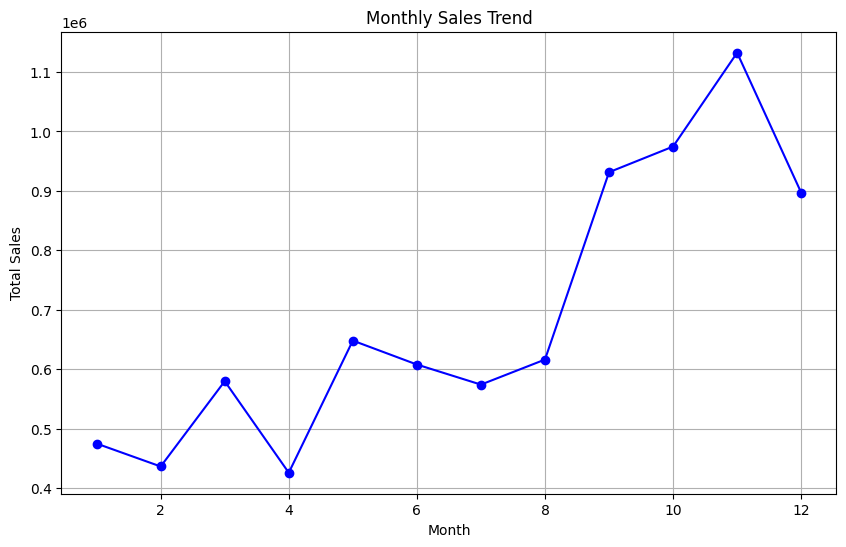

In [181]:
# Convert to Pandas
monthly_sales_df =monthly_sales.toPandas()
print(monthly_sales_df.columns)
# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_df['month'], monthly_sales_df['totalsum for each month'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# ---------

- Sales Distribution by Branch (Pie Chart)  / top 10

In [204]:
sales_branch_df = sales_branch.toPandas()

In [205]:
sales_branch_df.columns

Index(['branch_id', 'branch_name', 'totalsum for each Branch'], dtype='object')

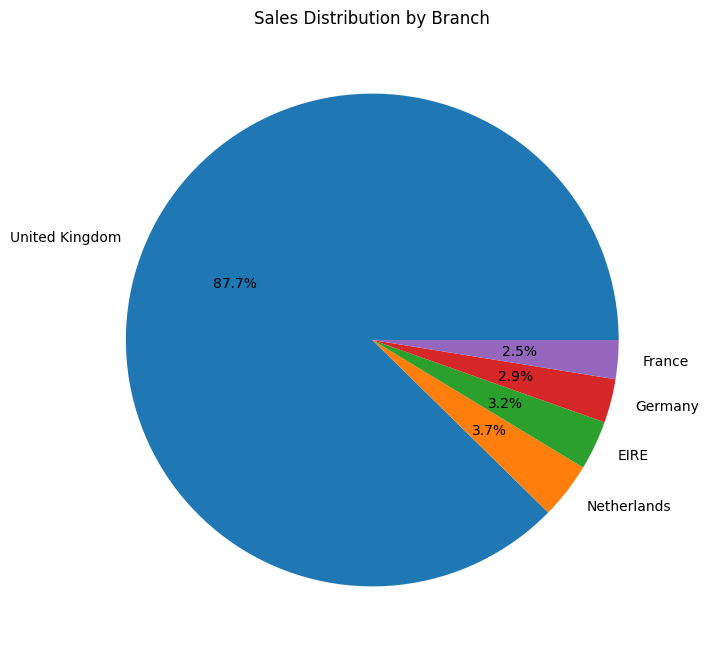

In [206]:
# Plot
plt.figure(figsize=(8, 8))
plt.pie(sales_branch_df['totalsum for each Branch'], labels=sales_branch_df['branch_name'], autopct='%1.1f%%')
plt.title('Sales Distribution by Branch')
plt.show()